In [1]:
import pandas as pd
from torch import tensor

In [2]:
meta_data = pd.read_csv("datasets/Glitches/trainingset_v1d0_metadata.csv")

In [3]:
filt = meta_data['sample_type'].isin(['train', 'validation'])
samples_per_class = dict(meta_data.loc[filt]['label'].value_counts())
class_weights = tensor([max(samples_per_class.values())/n_samples for _, n_samples in sorted(samples_per_class.items())])

In [4]:
for idx, label in enumerate(meta_data['label'].unique()):
    print(f'{label:<20}: {class_weights[idx]:.2f}')

1080Lines           : 5.70
1400Ripples         : 8.07
Air_Compressor      : 32.43
Blip                : 1.00
Chirp               : 28.38
Extremely_Loud      : 4.12
Helix               : 6.70
Koi_Fish            : 2.25
Light_Modulation    : 3.26
Low_Frequency_Burst : 2.84
Low_Frequency_Lines : 4.13
No_Glitch           : 10.32
None_of_the_Above   : 21.19
Paired_Doves        : 69.09
Power_Line          : 4.13
Repeating_Blips     : 6.54
Scattered_Light     : 4.07
Scratchy            : 5.28
Tomte               : 16.21
Violin_Mode         : 3.96
Wandering_Line      : 42.95
Whistle             : 6.14


In [5]:
class_weights

tensor([ 5.6953,  8.0660, 32.4286,  1.0000, 28.3750,  4.1166,  6.7046,  2.2507,
         3.2628,  2.8426,  4.1273, 10.3182, 21.1867, 69.0870,  4.1273,  6.5391,
         4.0744,  5.2791, 16.2143,  3.9626, 42.9459,  6.1351],
       dtype=torch.float64)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = np.array(list(samples_per_class.values()))
x

array([1589,  706,  559,  487,  401,  390,  386,  385,  385,  301,  279,
        259,  243,  237,  197,  154,   98,   75,   56,   49,   37,   23])

In [8]:
betas = [0.9, 0.99, 0.999, 0.9999]

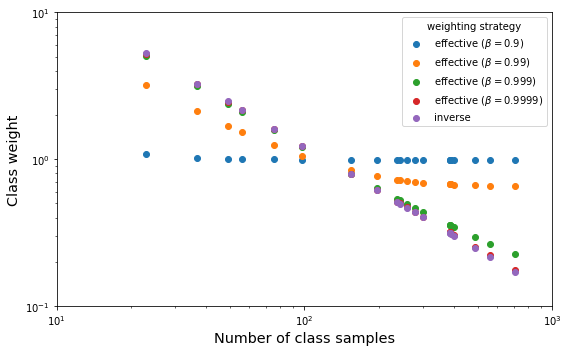

In [20]:
fig = plt.figure(figsize=(8, 5))

for beta in betas:
    y = (1.0 - beta) / (1.0 - np.power(beta, x))
    y = y / np.sum(y) * len(x)
    plt.scatter(x, y, label = rf'effective ($\beta =${beta})')
y = 1 / x
y = y / np.sum(y) * len(x)
plt.scatter(x, y, label='inverse')
# y = 1 / np.sqrt(x)
# y = y / np.sum(y) * len(x)
# plt.scatter(x, y, label='sqrt')
plt.xlim([10, 1000])
plt.ylim([0.1, 10])
plt.xlabel('Number of class samples', fontsize='x-large')
plt.ylabel('Class weight', fontsize='x-large')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='weighting strategy');
#plt.legend(title='weighting strategy', ncol=1, loc='lower left');

fig.tight_layout()

fig.savefig('../figs/glitches/07_loss_weights.png', dpi=300)

In [10]:
beta = 0.99
y = (1.0 - beta) / (1.0 - np.power(beta, x))
y = y / np.sum(y) * len(x)
max(y)-min(y)

2.534178486835194